<h1>Data Science Privacy Task Sheet Answers - Brandon Barclay-Knight<h1>

<h2>Inital data configuration<h2>

In [469]:
#Importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [470]:
#Reading tasksheetdataa.csv to a dataframe
dataFrameA = pd.read_csv("datasets/tasksheetdataa.csv")
dataFrameA.head()


,fileid,stusab,chariter,cifsn,logrecno,p0010001,sumlev,geocomp,zcta5,arealand,areawatr,name,funcstat,pop100,hu100,intptlat,intptlon,lsadc
0,UR1US,US,0,1,479832,18570,860,0,601,166659789,799296,ZCTA5 00601,S,18570,7744,18.180556,-66.749961,Z5
1,UR1US,US,0,1,479836,41520,860,0,602,79288158,4446273,ZCTA5 00602,S,41520,18073,18.362268,-67.176130,Z5
2,UR1US,US,0,1,479839,54689,860,0,603,81880442,183425,ZCTA5 00603,S,54689,25653,18.455183,-67.119887,Z5
3,UR1US,US,0,1,479842,6615,860,0,606,109580061,12487,ZCTA5 00606,S,6615,2877,18.158345,-66.932911,Z5
4,UR1US,US,0,1,479847,29016,860,0,610,93021467,4172001,ZCTA5 00610,S,29016,12618,18.290955,-67.125868,Z5


In [471]:
#dropping irrelavent columns
dfA = dataFrameA.drop(columns = ['fileid', 'stusab', 'chariter', 'cifsn', 'logrecno', 'p0010001', 'sumlev', 'geocomp', 'funcstat', 'lsadc'])
dfA = dfA[dfA.pop100 != 0]
dfA.head()

,zcta5,arealand,areawatr,name,pop100,hu100,intptlat,intptlon
0,601,166659789,799296,ZCTA5 00601,18570,7744,18.180556,-66.749961
1,602,79288158,4446273,ZCTA5 00602,41520,18073,18.362268,-67.176130
2,603,81880442,183425,ZCTA5 00603,54689,25653,18.455183,-67.119887
3,606,109580061,12487,ZCTA5 00606,6615,2877,18.158345,-66.932911
4,610,93021467,4172001,ZCTA5 00610,29016,12618,18.290955,-67.125868


In [472]:
#reading tasksheetdataz.csv to a dataframe
dataFrameZ = pd.read_csv("datasets/tasksheetdataz.csv")
dataFrameZ.head()

,country,zip,city,state,stusab,county,county_fips,community,community_code,latitude,longitude,accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


In [473]:
#dropping irrelavent columns
dfZ = dataFrameZ.drop(columns=['country', 'county_fips', 'community', 'community_code', 'latitude', 'longitude', 'accuracy']).dropna(how = 'any')
dfZ

,zip,city,state,stusab,county
0,99553,Akutan,Alaska,AK,Aleutians East
1,99571,Cold Bay,Alaska,AK,Aleutians East
2,99583,False Pass,Alaska,AK,Aleutians East
3,99612,King Cove,Alaska,AK,Aleutians East
4,99661,Sand Point,Alaska,AK,Aleutians East
...,...,...,...,...,...
40953,82442,Ten Sleep,Wyoming,WY,Washakie
40954,82701,Newcastle,Wyoming,WY,Weston
40955,82715,Four Corners,Wyoming,WY,Weston
40956,82723,Osage,Wyoming,WY,Weston


In [474]:
#inner join on the two dataframes created above on the zipcodes
df = pd.merge(left=dfA, right=dfZ, left_on='zcta5', right_on='zip').drop('zip', axis=1)
df.head()


,zcta5,arealand,areawatr,name,pop100,hu100,intptlat,intptlon,city,state,stusab,county
0,1001,29635470,2229770,ZCTA5 01001,16769,7557,42.062332,-72.628274,Agawam,Massachusetts,MA,Hampden
1,1002,142556362,4280260,ZCTA5 01002,29049,10388,42.363977,-72.458507,Amherst,Massachusetts,MA,Hampshire
2,1003,1842384,12788,ZCTA5 01003,10372,5,42.389941,-72.524108,Amherst,Massachusetts,MA,Hampshire
3,1005,114586903,667042,ZCTA5 01005,5079,2044,42.418848,-72.106598,Barre,Massachusetts,MA,Worcester
4,1007,136345999,6943853,ZCTA5 01007,14649,5839,42.279010,-72.400468,Belchertown,Massachusetts,MA,Hampshire


<h1>a) State with the most 5-digit ZIP codes<h1>

In [475]:
df['state'].value_counts().head()

Texas           1929
Pennsylvania    1788
New York        1768
California      1752
Illinois        1383
Name: state, dtype: int64

<p1>The state with the most 5-digit ZIP codes is Texas with 1929<p1>

<h2>b)<h2>

<h3>i) Most easterly<h3>

In [476]:
df.loc[df['intptlat'].idxmax()].loc['zcta5']

99723

<p1>Most easterly excluding Alaska<p1>

In [477]:
dfWithoutAlaska = df[df.state != 'Alaska']
dfWithoutAlaska.loc[dfWithoutAlaska['intptlat'].idxmax()].loc['zcta5']

56711

<h3>ii) Most westerly<h3>

In [478]:
df.loc[df['intptlat'].idxmin()].loc['zcta5']

96737

<h3>iii) Most northerly<h3>

In [479]:
df.loc[df['intptlon'].idxmax()].loc['zcta5']

4631

<h2>c) ZIP code with highest population density<h2>

In [480]:
#The arealand atrribute is currently in square metres so I will convert this to square kilometres
#Resulting population density will be in people per sq kilometres
df["popdensity"] = round(df["pop100"] / (df["arealand"]/1000000),2)
df

,zcta5,arealand,areawatr,name,pop100,hu100,intptlat,intptlon,city,state,stusab,county,popdensity
0,1001,29635470,2229770,ZCTA5 01001,16769,7557,42.062332,-72.628274,Agawam,Massachusetts,MA,Hampden,565.84
1,1002,142556362,4280260,ZCTA5 01002,29049,10388,42.363977,-72.458507,Amherst,Massachusetts,MA,Hampshire,203.77
2,1003,1842384,12788,ZCTA5 01003,10372,5,42.389941,-72.524108,Amherst,Massachusetts,MA,Hampshire,5629.66
3,1005,114586903,667042,ZCTA5 01005,5079,2044,42.418848,-72.106598,Barre,Massachusetts,MA,Worcester,44.32
4,1007,136345999,6943853,ZCTA5 01007,14649,5839,42.279010,-72.400468,Belchertown,Massachusetts,MA,Hampshire,107.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32827,99923,35937519,2117,ZCTA5 99923,87,90,56.002315,-130.041026,Hyder,Alaska,AK,Prince of Wales-Hyder,2.42
32828,99925,144503281,36906383,ZCTA5 99925,819,400,55.550204,-132.945933,Klawock,Alaska,AK,Prince of Wales-Hyder,5.67
32829,99926,343947256,213335869,ZCTA5 99926,1460,544,55.138069,-131.470741,Metlakatla,Alaska,AK,Prince of Wales-Hyder,4.24
32830,99927,589688205,18001151,ZCTA5 99927,94,101,56.239062,-133.457924,Point Baker,Alaska,AK,Prince of Wales-Hyder,0.16


In [481]:
#locate the row with the maximum popdensity value in the dataframe
df.loc[df['popdensity'].idxmax()]

zcta5                        20052
arealand                      7062
areawatr                         0
name                   ZCTA5 20052
pop100                         470
hu100                            6
intptlat                 38.900126
intptlon                -77.046981
city                    Washington
state         District of Columbia
stusab                          DC
county        District of Columbia
popdensity                66553.38
Name: 6064, dtype: object

<p1>ZIP code 20052 has a population density of 66553.38 people per square kilometre.<p1>

<h2>d)<h2>

<h3>i)<h3>

In [482]:
#creating new column for 3 digit zip codes
#df["popdensity"] = round(df["pop100"] / (df["arealand"]/1000000),2)

df["zcta3"] = (df["zcta5"] - (df["zcta5"] % 100)) // 100  
df

,zcta5,arealand,areawatr,name,pop100,hu100,intptlat,intptlon,city,state,stusab,county,popdensity,zcta3
0,1001,29635470,2229770,ZCTA5 01001,16769,7557,42.062332,-72.628274,Agawam,Massachusetts,MA,Hampden,565.84,10
1,1002,142556362,4280260,ZCTA5 01002,29049,10388,42.363977,-72.458507,Amherst,Massachusetts,MA,Hampshire,203.77,10
2,1003,1842384,12788,ZCTA5 01003,10372,5,42.389941,-72.524108,Amherst,Massachusetts,MA,Hampshire,5629.66,10
3,1005,114586903,667042,ZCTA5 01005,5079,2044,42.418848,-72.106598,Barre,Massachusetts,MA,Worcester,44.32,10
4,1007,136345999,6943853,ZCTA5 01007,14649,5839,42.279010,-72.400468,Belchertown,Massachusetts,MA,Hampshire,107.44,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32827,99923,35937519,2117,ZCTA5 99923,87,90,56.002315,-130.041026,Hyder,Alaska,AK,Prince of Wales-Hyder,2.42,999
32828,99925,144503281,36906383,ZCTA5 99925,819,400,55.550204,-132.945933,Klawock,Alaska,AK,Prince of Wales-Hyder,5.67,999
32829,99926,343947256,213335869,ZCTA5 99926,1460,544,55.138069,-131.470741,Metlakatla,Alaska,AK,Prince of Wales-Hyder,4.24,999
32830,99927,589688205,18001151,ZCTA5 99927,94,101,56.239062,-133.457924,Point Baker,Alaska,AK,Prince of Wales-Hyder,0.16,999


In [483]:
#create a new dataframe where it is only state and zcta3, then remove duplicate state,zcta3 pairs
df2 = df[['state', 'zcta3','city']].drop_duplicates(subset = ['state','zcta3'])


#find the zcta3 values that have more than one state
df2[df2.duplicated(['zcta3'],keep=False)]


,state,zcta3,city
1648,Connecticut,63,New London
1682,New York,63,Fishers Island
28323,Idaho,834,Idaho Falls
28327,Wyoming,834,Alta


<h3>ii)<h3>

<p1>The residents of these particular places have higher risk of re-identification because their 3 digit ZIP code is a part of a small subgroup of locations. This could make cross-referencing data to public records easier to potentially get their 5 digit ZIP code knowing they belong to this sub-category.<p1>

<h3>iii)<h3>

<p1>Potentially what could be done is identifying the specific rows that would be classified as "high risk" and remove them from the data set. Determining whether someone is high risk would be a case of considering which data could be overlapping with publically available data. This would however reduce the value of the dataset so it would be important to fine tune the risk assessment process of the data.<p1>

<h2>e)<h2>

In [484]:
#3zcta, state, pop100, arealand
df_e = df[['zcta3','state', 'pop100', 'arealand']].drop(labels = [1648 ,1682, 28323, 28327])
df_e = df_e.groupby(['zcta3', 'state'])[['pop100', 'arealand']].sum()
df_e["popdensity"] = round(df_e["pop100"] / (df_e["arealand"]/1000000),2)
df_e = df_e.reset_index()
df_e.head()

,zcta3,state,pop100,arealand,popdensity
0,10,Massachusetts,469375,3280116609,143.10
1,11,Massachusetts,168835,106054753,1591.96
2,12,Massachusetts,130689,2360467856,55.37
3,13,Massachusetts,83111,2029083678,40.96
4,14,Massachusetts,211812,1231149054,172.04


<h3>i)<h3>

In [485]:
#the 3-digit zip codes with population less than 20,000
e_i = df_e.query('10 < pop100 < 20000')
e_i

,zcta3,state,pop100,arealand,popdensity
26,36,New Hampshire,13759,525626811,26.18
48,59,Vermont,3525,1168172499,3.02
81,102,New York,12636,585228,21591.58
180,203,District of Columbia,1702,2489901,683.56
336,369,Alabama,19164,3159815117,6.06
508,556,Minnesota,16024,7788672063,2.06
631,692,Nebraska,8637,12215685056,0.71
742,821,Wyoming,369,7698493836,0.05
744,823,Wyoming,16430,13883818454,1.18
785,878,New Mexico,18552,24362674732,0.76


In [486]:
#number of 3-digit zip codes with population less than 20,000
len(e_i.pop100)

13

<h3>ii)<h3>

<p1>I would say that it is good that these 3 digit ZIP codes have been recognised as a particularly high risk group considering the small population assigned to them. Amalgamating them into a single group makes it statistically more difficult for potential attackers to re-identify these people purely based on the number of people who now have the same 3 digit ZIP code. The more people that are in a known ZIP code, the harder it will be to pinpoint who an individual is based on anonymous data. However, I think that if they would have any other information referring to location on these particular people it may be a detriment as it would be easier to narrow down from the 13 places in the group.<p1>

<h3>iii)<h3>

<p1> 
Rather than amalgamating the low population zip-codes into their own seperate group I would suggest that they get added to one of their neighbouring ZIP codes. This way they are essentially added to the population of a larger ZIP code and decreasing the chance of being identified from a dataset. I think this would be an option worth exploring for this problem. There may be other implications that I am not aware of with this method but I think it is worth discussing. 
<p1>

<h3>iv)<h3>

<AxesSubplot:xlabel='zcta3', ylabel='popdensity'>

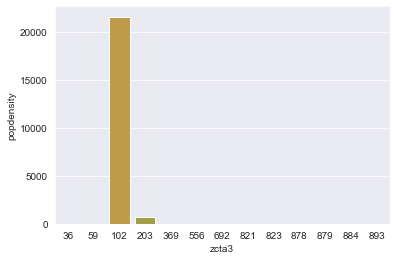

In [487]:
#ploting zct3 against popdensity on a bar plot
sns.set_style('darkgrid')
sns.barplot(x = 'zcta3', y = 'popdensity', data = e_i)

<p1>There is a clear outlier here in zcta3 = 102. The population density is extreme compared to the others in this subset. The only other zip-code that is visible on the graph is 203 and it is a large margin behind 102 still. In the scope of this selecive data they are both outliers in terms of their population density. This does show that the population density of these low population zip-codes are generally very low. They have low populations but their land area is high in comparison.<p1>

<AxesSubplot:xlabel='zcta3', ylabel='popdensity'>

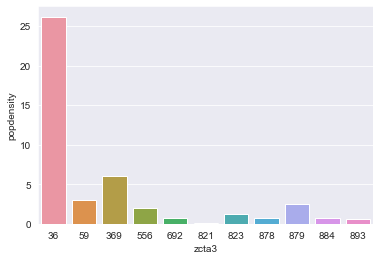

In [488]:
#removing the outliers
e_i = e_i[e_i.index != 81]
e_i = e_i[e_i.index != 180]

sns.barplot(x = 'zcta3', y = 'popdensity', data = e_i)

<h3>v)<h3>

In [489]:
df_e.loc[df_e['popdensity'].idxmin()]

zcta3                821
state            Wyoming
pop100               369
arealand      7698493836
popdensity          0.05
Name: 742, dtype: object

<p1>I think I would've expected it to be a ZIP code in Alaska since it has the lowest population density of any state. However, it is not too surprising since Wyoming also has a low population density. <p1>

<h2>f)<h2>

<p1>
    
As you would expect, the population sizes for 5-digit ZIP codes are on a much smaller scale than the 3-digit ZIP codes. In both distributions it is evident that the majority of the ZIP codes are on the lower end in terms of population size. The gap between the median for both distributions are far away from the maximum value in these data sets, and are skewed heavily towards the lower end of the distribution. When considering the entirety of the two data sets, they are shaped quite similarly.

Now I will discuss the top 100 populated ZIP codes from both distributions. In the 5 digit ZIP codes the population amongst the top 100 has a more even distribution when comparing it to the top 100 3 digit ZIP codes. The top 100 3 digit ZIP codes are more skewed towards the lower end of the distribution. They are both still very top heavy in terms of population size. An interesting thing to note also is that the 3 digit ZIP code distribution in this case has a lot more outliers than the 5 digit ZIP code distribution. This shows that there are a select number of zip codes that hold the majority of the population. 
    
Next I will discuss the 100 lowest populated ZIP codes from both distributions. In the 5 digit ZIP codes the distribution is very normalised, and the 3 digit ZIP code distribution is skewed toward the higher end of the distribution surprisingly. This indicates that there are not many 3 digit ZIP codes that have a very low population whereas there are a lot of 5 digit ZIP codes that have a low population. 
    
In general, the data presents that the ZIP codes at the top of the distribution in terms of population have very large populations and there is not many of them. This is why they are considered to be outliers in the distribution. A large number of 5 digit ZIP codes have very few people populating them, where only a handful of 3 digit ZIP codes have very low population numbers. 
<p1>

<h2> Appendix <h2>

[Text(0.5, 1.0, 'Distribution of population across 5 digit ZIP codes')]

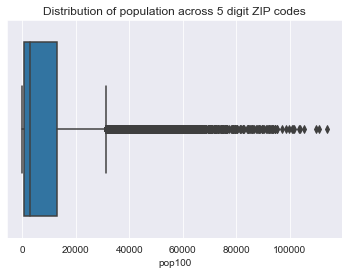

In [490]:
#Box plot showing the entire distribution of population sizes for 5 digit ZIP codes
sns.boxplot(x=df['pop100']).set(title = "Distribution of population across 5 digit ZIP codes")

[Text(0.5, 1.0, 'Distribution of population across 3 digit ZIP codes')]

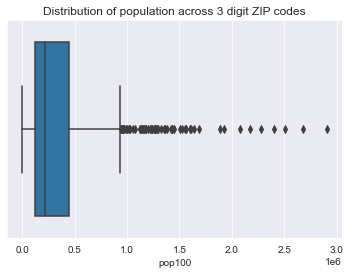

In [491]:
#Box plot showing the entire distribution of population sizes for 3 digit ZIP codes
sns.boxplot(x=df_e['pop100']).set(title = "Distribution of population across 3 digit ZIP codes")

[Text(0.5, 1.0, 'Top 100 populated 5 digit ZIP codes')]

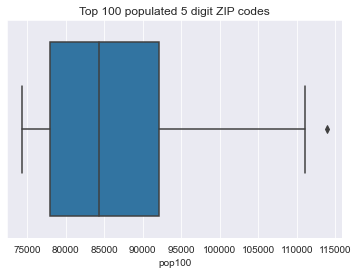

In [492]:
#Box plot showing top 100 populated 5 digit ZIP codes
df_plt = df.nlargest(100, 'pop100')
sns.boxplot(x = df_plt['pop100']).set(title = "Top 100 populated 5 digit ZIP codes")

[Text(0.5, 1.0, 'Top 100 populated 3 digit ZIP codes')]

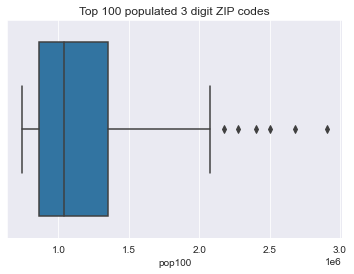

In [493]:
#Box plot showing top 100 populated 3 digit ZIP codes
df_e_plt = df_e.nlargest(100, 'pop100')
sns.boxplot(x = df_e_plt['pop100']).set(title = "Top 100 populated 3 digit ZIP codes")

[Text(0.5, 1.0, '100 Lowest populated 5 digit ZIP codes')]

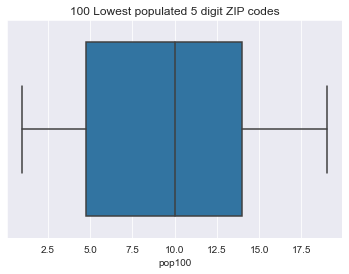

In [494]:
#Box plot showing 100 lowest populated 5 digit ZIP codes
df_plt = df.nsmallest(100, 'pop100')
sns.boxplot(x = df_plt['pop100']).set(title = "100 Lowest populated 5 digit ZIP codes")

[Text(0.5, 1.0, '100 Lowest populated 3 digit ZIP codes')]

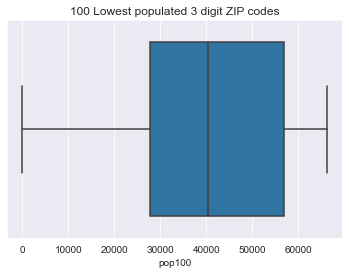

In [495]:
#Box plot showing 100 lowest populated 3 digit ZIP codes
df_e_plt = df_e.nsmallest(100, 'pop100')
sns.boxplot(x = df_e_plt['pop100']).set(title = "100 Lowest populated 3 digit ZIP codes")